### Download the model checkpoint

In [1]:
!mkdir ../../../repos/tf_ctpn_cpu/checkpoints
!cd ../../../repos/tf_ctpn_cpu/checkpoints/ && wget https://www.dropbox.com/s/ghxowdua65r82d6/checkpoint -O checkpoint
!cd ../../../repos/tf_ctpn_cpu/checkpoints/ && wget https://www.dropbox.com/s/v9w4mhcks7a719k/VGGnet_fast_rcnn_iter_50000.ckpt.data-00000-of-00001 -O VGGnet_fast_rcnn_iter_50000.ckpt.data-00000-of-00001
!cd ../../../repos/tf_ctpn_cpu/checkpoints/ && wget https://www.dropbox.com/s/2d0licy8npype6r/VGGnet_fast_rcnn_iter_50000.ckpt.index -O VGGnet_fast_rcnn_iter_50000.ckpt.index
!cd ../../../repos/tf_ctpn_cpu/checkpoints/ && wget https://www.dropbox.com/s/vwmz2ra9jovlxjd/VGGnet_fast_rcnn_iter_50000.ckpt.meta -O VGGnet_fast_rcnn_iter_50000.ckpt.meta    

--2018-04-08 19:28:19--  https://www.dropbox.com/s/ghxowdua65r82d6/checkpoint
Resolving www.dropbox.com (www.dropbox.com)... 162.125.7.1, 2620:100:601a:1:ffff:ffff:a27d:701
Connecting to www.dropbox.com (www.dropbox.com)|162.125.7.1|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://dl.dropboxusercontent.com/content_link/hzBir92vDAxLW45eoONhAspNrTS2BY5BH82stB7ge7Zadio7WqC6NbQ8IVUcbRWT/file [following]
--2018-04-08 19:28:20--  https://dl.dropboxusercontent.com/content_link/hzBir92vDAxLW45eoONhAspNrTS2BY5BH82stB7ge7Zadio7WqC6NbQ8IVUcbRWT/file
Resolving dl.dropboxusercontent.com (dl.dropboxusercontent.com)... 162.125.7.6, 2620:100:601a:6:ffff:ffff:a27d:706
Connecting to dl.dropboxusercontent.com (dl.dropboxusercontent.com)|162.125.7.6|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121 [text/plain]
Saving to: 'checkpoint'

checkpoint          100%[===================>]     121  --.-KB/s    in 0s      

2018-04-08 19:28:22 (7.00

In [2]:
import sys
import cv2
import tensorflow as tf
from IPython.display import display, Image
sys.path.append('../../../server/')
from dvalib import detector
from glob import glob
try:
    os.mkdir('boxes')
except:
    pass

/usr/local/lib/python2.7/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
text_detector = detector.TextBoxDetector(model_path='../../../repos/tf_ctpn_cpu/checkpoints/checkpoint')
text_detector.load()
box_count = 0

Tensor("Placeholder:0", shape=(?, ?, ?, 3), dtype=float32)
Tensor("conv5_3/conv5_3:0", shape=(?, ?, ?, 512), dtype=float32)
Tensor("rpn_conv/3x3/rpn_conv/3x3:0", shape=(?, ?, ?, 512), dtype=float32)


Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("lstm_o/Reshape:0", shape=(?, ?, ?, 128), dtype=float32)
Tensor("rpn_cls_score/Reshape:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_cls_prob:0", shape=(?, ?, ?, ?), dtype=float32)
Tensor("Reshape_5:0", shape=(?, ?, ?, 20), dtype=float32)
Tensor("rpn_bbox_pred/Reshape:0", shape=(?, ?, ?, 40), dtype=float32)
Tensor("Placeholder_1:0", shape=(?, 3), dtype=float32)
INFO:tensorflow:Restoring parameters from ../../../repos/tf_ctpn_cpu/checkpoints/VGGnet_fast_rcnn_iter_50000.ckpt


INFO:tensorflow:Restoring parameters from ../../../repos/tf_ctpn_cpu/checkpoints/VGGnet_fast_rcnn_iter_50000.ckpt


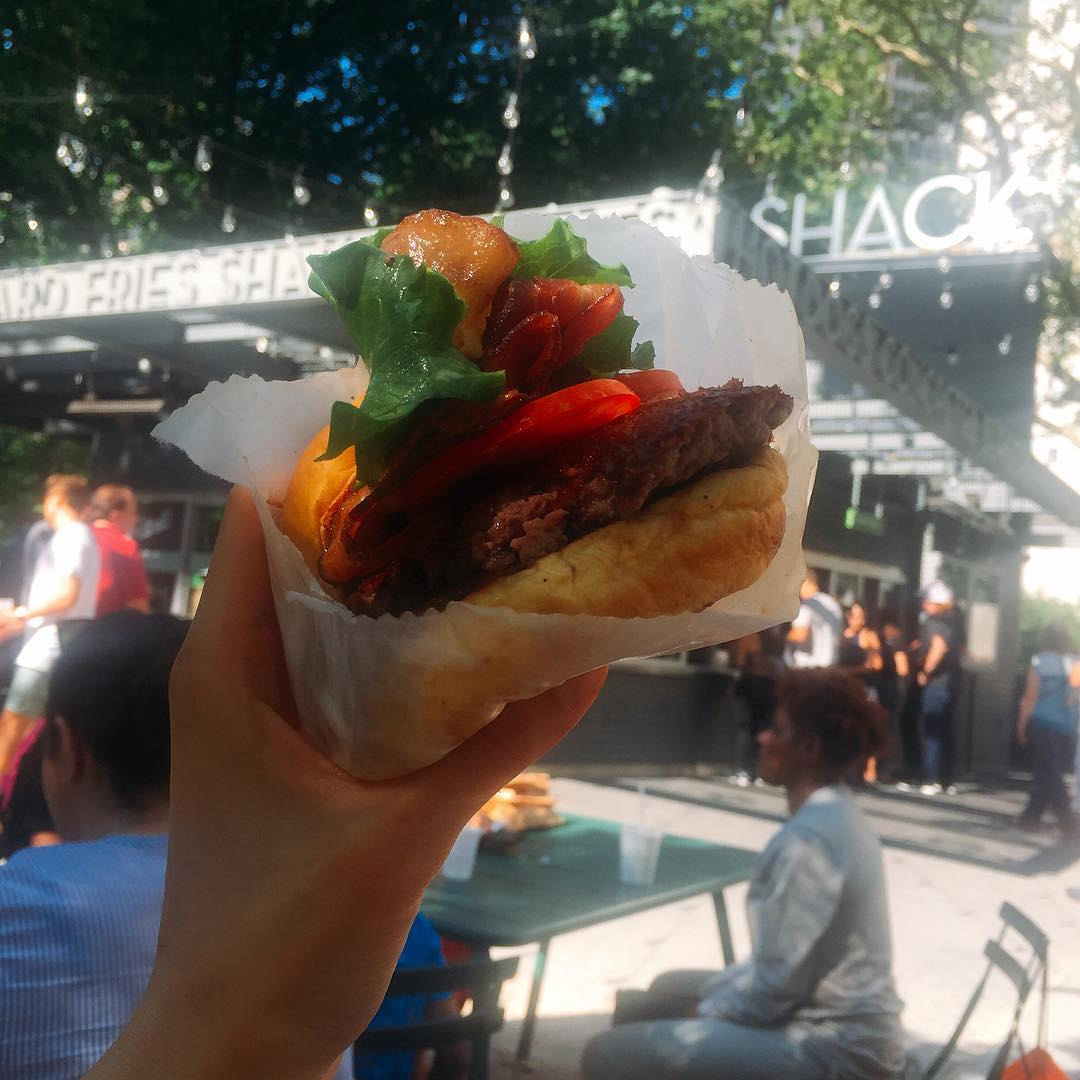

0.947239756584


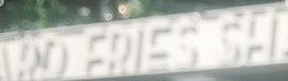

0.964626312256


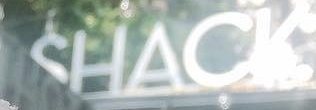

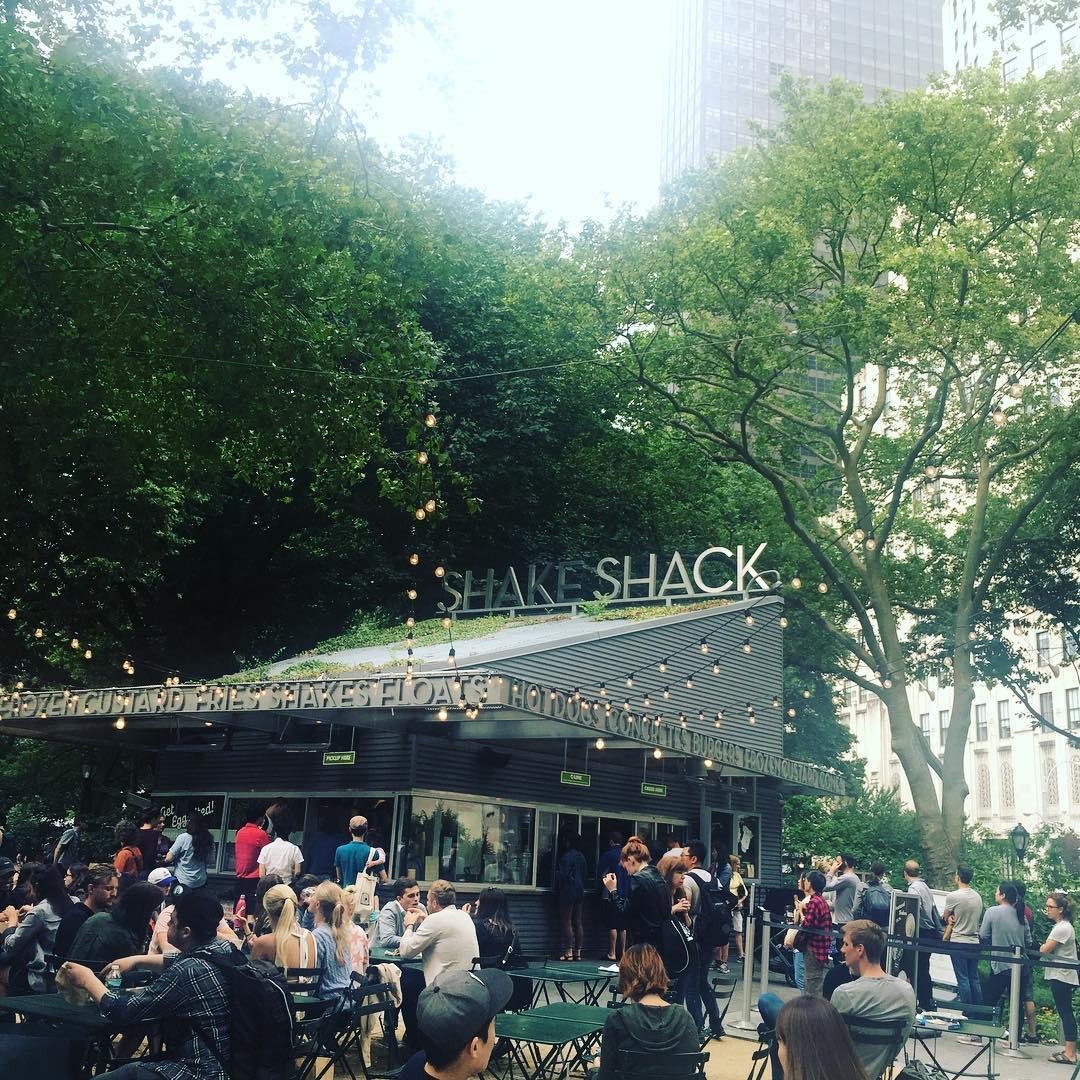

0.917310535908


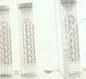

0.93527841568


0.967172145844


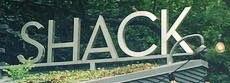

0.83451628685


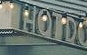

0.808347463608


0.931361734867


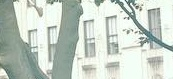

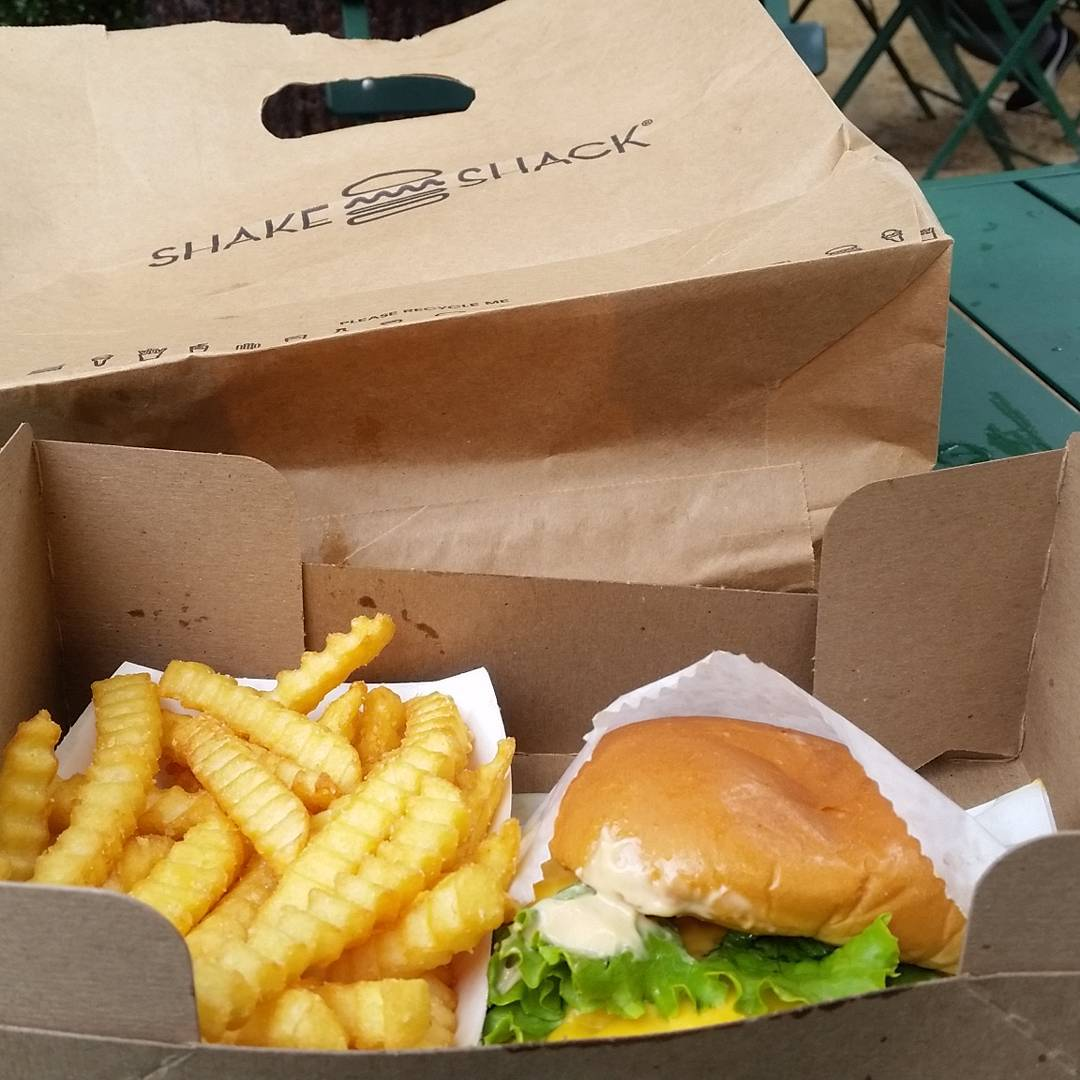

0.965944468975


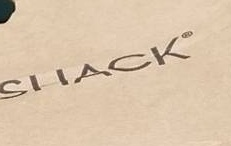

0.973145782948


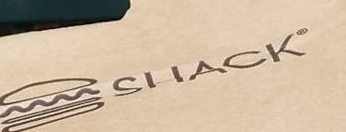

0.971495509148


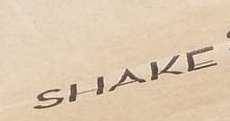

0.912448525429


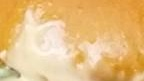

0.900613963604


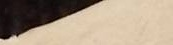

In [4]:
for im_name in glob("images/*.jpg"):
    display(Image(im_name,width=300))
    regions = text_detector.detect(im_name)
    im=cv2.imread(im_name)
    for k in regions:
        crop_img = im[int(k['y']):int(k['y'] + k['h']),int(k['x']):int(k['x'] + k['w'])]
        print k['score']
        cv2.imwrite('boxes/box_{}.jpg'.format(box_count),crop_img)
        display(Image('boxes/box_{}.jpg'.format(box_count)))
        box_count += 1